In [113]:
import pandas as pd , re
from copy import deepcopy
from sklearn.preprocessing import MinMaxScaler
import calendar , numpy as np
import itertools
import dill

In [114]:
USECOL = ['occur', 'farm_no_fake', 'dt', 'chicken', 'turkey', 'duck', 'goose', 'quail', 'ornamental_bird', 'pheasant', 'ostrich', 'wild_bird', 'wild_duck', 'grow_other_species_except_for_poultry', 't_1_livestock_excrement_convey', 't_1_cattle_convey', 't_1_repair_machine', 't_1_animal_medicine_convey', 't_1_feed_convey', 't_1_sampling_disinfect', 't_1_egg_convey', 't_1_straw_convey', 't_1_oil_convey', 't_1_bulky_feed_convey', 't_1_vaccinate', 't_1_consulting', 't_1_maxTmpr', 't_1_minTmpr', 't_1_maxHmdt', 't_1_minHmdt', 't_1_maxWnds', 't_1_minWnds', 't_1_rainfall', 'bird_proof', 'access_control', 'signage', 'foot_bath', 'anteriorroom', 'gate_U_shape_spray', 'gate_ternal_shape_spray', 'gate_high_pressure_washer', 'gate_washstation', 'inside_high_pressure_washer', 'inside_backpack_sprayer']

In [115]:
paths = ["/var/disk/train_v8_5th_1.ftr" , "/var/disk/test_v8_6th_1.ftr"] #  , 
result = []
for path in paths :
    data = pd.read_feather(path)[USECOL]
    result.append(data)
    print(f"After : {data.shape}")
    

After : (265196, 44)
After : (347710, 44)


In [116]:
data = pd.concat(result,axis = 0)
data = data.reset_index(drop=True)

In [117]:
vartype = ['factor', 'numeric', 'date', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'factor', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'factor', 'factor', 'factor', 'factor', 'factor', 'factor', 'factor', 'factor', 'factor', 'factor', 'factor']

In [118]:
print(vartype)

['factor', 'numeric', 'date', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'factor', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'factor', 'factor', 'factor', 'factor', 'factor', 'factor', 'factor', 'factor', 'factor', 'factor', 'factor']


In [119]:
from datetime import datetime
month_day = lambda x: f"{datetime.strptime(x, '%Y-%m-%d' ).month:02d}-{datetime.strptime(x, '%Y-%m-%d' ).day:02d}"
year_month = lambda x: f"{datetime.strptime(x, '%Y-%m-%d' ).year}_{datetime.strptime(x, '%Y-%m-%d' ).month}"
totalcols = data.columns.tolist()

In [120]:
vartypes = dict(zip(totalcols , vartype))

In [121]:
dt2 = deepcopy(data["dt"])
year_month = [i.split("_") for i in dt2.apply(year_month).unique().tolist()]

In [122]:
days = []
lists = []
for idx , month in enumerate(np.arange(1,13)) :
    year = 2016
    result = calendar.monthcalendar(int(year), int(month))
    merged = np.arange(1,32)
    month_day_v = ['{0:02d}-{1:02d}'.format(int(month) ,i) for i in merged]
    days.extend(month_day_v)
    if idx == 0 :
        lists.extend(merged)
        final = merged[-1]
    else :
        result = [final+1 + i  for i in merged]
        final = result[-1]
        lists.extend(result)        

In [123]:
data["month_day"] = dt2.apply(month_day)
data["month_day"].head()

0    10-16
1    10-16
2    10-16
3    10-16
4    10-16
Name: month_day, dtype: object

In [124]:
mapping = MinMaxScaler(feature_range=(-1,1)).fit_transform(np.array(lists).reshape(-1,1))
mapping

array([[-1.        ],
       [-0.9947644 ],
       [-0.9895288 ],
       [-0.98429319],
       [-0.97905759],
       [-0.97382199],
       [-0.96858639],
       [-0.96335079],
       [-0.95811518],
       [-0.95287958],
       [-0.94764398],
       [-0.94240838],
       [-0.93717277],
       [-0.93193717],
       [-0.92670157],
       [-0.92146597],
       [-0.91623037],
       [-0.91099476],
       [-0.90575916],
       [-0.90052356],
       [-0.89528796],
       [-0.89005236],
       [-0.88481675],
       [-0.87958115],
       [-0.87434555],
       [-0.86910995],
       [-0.86387435],
       [-0.85863874],
       [-0.85340314],
       [-0.84816754],
       [-0.84293194],
       [-0.83246073],
       [-0.82722513],
       [-0.82198953],
       [-0.81675393],
       [-0.81151832],
       [-0.80628272],
       [-0.80104712],
       [-0.79581152],
       [-0.79057592],
       [-0.78534031],
       [-0.78010471],
       [-0.77486911],
       [-0.76963351],
       [-0.76439791],
       [-0

In [125]:
day_2_value = dict(zip(days , np.squeeze(mapping)))

In [126]:
data["month_day"] = data["month_day"].replace(day_2_value)

In [127]:
data["month_day"].values

array([ 0.58638743,  0.58638743,  0.58638743, ..., -1.        ,
       -1.        , -1.        ])

In [128]:
data.drop(["dt"], axis = 1 , inplace = True)

In [129]:
farm_info = pd.read_csv("./outdata_farm_v5.csv")
farm_info = farm_info[['NO', 'LATITUDE', 'LONGITUDE']].drop_duplicates(["NO"]).reset_index(drop=True)
mapping_info_farm = farm_info.rename(columns = {"NO" : "farm_no_fake"})
where = data[["farm_no_fake"]].merge(mapping_info_farm, how='left')

In [130]:
where_cols = ['LATITUDE', 'LONGITUDE']
data[where_cols] = where[where_cols]

In [131]:
lat = MinMaxScaler(feature_range=(-1,1))
lon = MinMaxScaler(feature_range=(-1,1))
lat.fit(np.append(data["LATITUDE"].values , [33,43]).reshape(-1,1))
lon.fit(np.append(data["LONGITUDE"].values , [124,132]).reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(-1, 1))

In [132]:
data["LATITUDE"] = lat.transform(data["LATITUDE"].values.reshape(-1,1))
data["LONGITUDE"] = lon.transform(data["LONGITUDE"].values.reshape(-1,1))

In [133]:
trans_cols = data.columns.tolist()
trans_cols.remove("farm_no_fake")
data[trans_cols] = data[trans_cols].astype(float)

In [134]:
#data.select_dtypes("object")
information = {}
information["monthday_2_value"] = day_2_value
information["farm_where"] = where
information["lat_minmax"] = lat
information["lon_minmax"] = lon
information["vartype"] = vartypes
with open('./total_2020_IITP_v2.pkl', 'wb') as wb :
    dill.dump(information, wb)

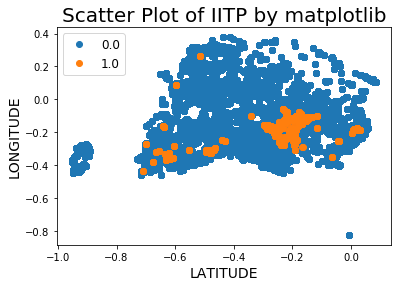

In [135]:
import matplotlib.pyplot as plt
# plt.scatter(data["LATITUDE"].values , data["LONGITUDE"].values)
# plt.show()
groups = data.groupby('occur')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.LATITUDE, 
            group.LONGITUDE, 
            marker='o', 
            linestyle='',
            label=name)
ax.legend(fontsize=12, loc='upper left') # legend position
plt.title('Scatter Plot of IITP by matplotlib', fontsize=20)
plt.xlabel('LATITUDE', fontsize=14)
plt.ylabel('LONGITUDE', fontsize=14)
plt.show()

In [136]:
data.shape

(612906, 46)

In [137]:
data.to_feather("/var/disk/total_2020_change_v2.ftr")